Spread: -3
Over/Under: 52
Percent of bets on the favorite: 41
Favorite: Lions
Underdog: Patriots

The projected outcome of the game is:

Lions          28.85
Patriots       23.15

The Lions are projected to win by about 6 points

Original Spread: -3.0
Optimized Spread: -5.7

Bet Suggestion: 
Bet the moneline on the Lions

Projected Box Score:
            1     2     3     4
Lions     7.2  14.4  21.6  28.9
Patriots  5.8  11.6  17.4  23.1




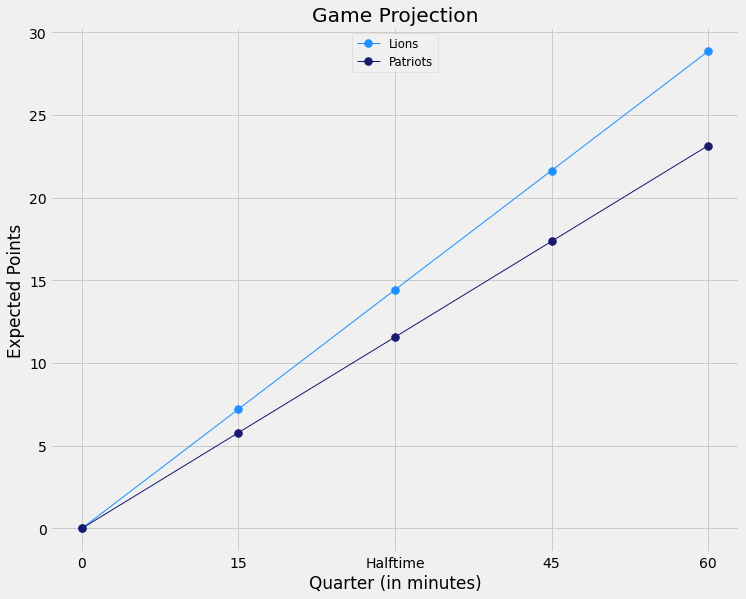

In [9]:
import numpy as np
import pandas as pd
def game_projection(spread, total, percent_of_bets, favteam, underdog):
    if spread<0:
        spread = spread *-1
    else:
        pass
    betsfinal = (percent_of_bets)/100
    optimizer = (spread + ((.5 - betsfinal)*30))
    ospread = float(format(optimizer, ".2"))
    x = ((total + ospread)/2)
    y = total - x
    total = x + y
    ospread = x - y
    print(f"\nThe projected outcome of the game is:\n")
    favtotal = f"{favteam.title():<15}{x:>1}"
    print(favtotal)
    dogtotal = f"{underdog.title():<15}{y:>1}"
    print(dogtotal)
    format_ospread = "{:.1f}".format(ospread)
    format_ospread = float(format_ospread)*-1
    if format_ospread <0:
        points_final = round(format_ospread)*-1
        if points_final == 1:
            print(f"\nThe {favteam.title()} are projected to win by about {points_final} point")
        if points_final >1:
            print(f"\nThe {favteam.title()} are projected to win by about {points_final} points")
    if format_ospread>0:
        ospread_final = round(format_ospread)
        if ospread_final == 1:
            print(f"\nUpset Alert! The {underdog.title()} are projected to win by about {ospread_final} point")
        else:
            print(f"\nUpset Alert! The {underdog.title()} are projected to win by about {ospread_final} points")

    print(f"\nOriginal Spread: -{spread}")
    print(f"\bOptimized Spread: {format_ospread}\n")
    spread = spread*-1 
    
    #BET SUGGESTION
    print("Bet Suggestion: ")
    bet1 = spread
    bet2 = format_ospread
    bet = bet1 - bet2
    if bet <=-4 and format_ospread >0:
        print(f"Bet the moneline on the {underdog.title()}")
    elif bet <=-4 and format_ospread <0:
        print(f"Bet the spread on the {underdog.title()}")
    elif -4<bet<=-2:
        print(f"Bet the spread on the {underdog.title()}")
    elif -2<bet<2:
        print("Do not bet on this game, there isn't enough edge")
    elif 2<=bet<4:
        print(f"Bet the moneline on the {favteam.title()}")
    elif bet>=4:
        print(f"Bet the spread on the {favteam.title()}")
    
    start = 0
    f1 = x/4  
    f2 = x/4+ x/4
    f3 = x/4 + x/4 + x/4 
    f4 = x/4 + x/4 + x/4 + x/4
    favteam_points = start, f1, f2, f3, f4
    favteam_points = tuple([float("{0:.2f}".format(n)) for n in favteam_points])
    u1 = y/4
    u2 = y/4+ y/4  
    u3 = y/4 + y/4 + y/4  
    u4 = y/4 + y/4 + y/4 + y/4
    underdog_points = start, u1, u2, u3, u4
    underdog_points = tuple([float("{0:.2f}".format(n)) for n in underdog_points])
    from pandas import DataFrame
    f1 = "{:.1f}".format(f1)
    f2 = "{:.1f}".format(f2)
    f3 = "{:.1f}".format(f3)
    f4 = "{:.1f}".format(f4)
    u1 = "{:.1f}".format(u1)
    u2 = "{:.1f}".format(u2)
    u3 = "{:.1f}".format(u3)
    u4 = "{:.1f}".format(u4)
    boxscore = {
        "1": [f1, u1],
        "2": [f2, u2],
        "3": [f3, u3],
        "4": [f4, u4]
        
    }
    rows = favteam.title(), underdog.title()
    data = pd.DataFrame(boxscore, rows)
    
    Quarter = ['0','15','Halftime','45', '60']
    Points1 = favteam_points
    Points2 = underdog_points
    colors = {
        'cardinals': 'red',
        'falcons': 'tab:red',
        'panthers': 'tab:cyan',
        'bears': 'midnightblue',
        'cowboys': 'mediumblue',
        'lions': 'dodgerblue',
        'packers': 'gold',
        'rams': 'royalblue',
        'vikings': 'darkviolet',
        'saints': 'goldenrod',
        'giants': 'blue',
        'eagles': 'mediumseagreen',
        '49ers': 'brown',
        'seahawks': 'teal',
        'bucs': 'maroon',
        'buccaneers': 'maroon',
        'football team': 'firebrick',
        'washington': 'firebrick', 
        'ravens': 'indigo',
        'bills': 'royalblue',
        'bengals': 'darkorange',
        'browns': 'tab:brown',
        'broncos': 'tab:orange',
        'texans': 'navy',
        'colts': 'deepskyblue',
        'jags': 'limegreen',
        'jaguars': 'limegreen',
        'chiefs': 'orangered',
        'raiders': 'slategray',
        'chargers': 'lightskyblue',
        'dolphins': 'cyan',
        'patriots': 'midnightblue',
        'pats': 'midnightblue',
        'jets': 'green',
        'steelers': 'black',
        'titans': 'mediumturquoise'
    }
    
    print("\nProjected Box Score:")
    print(data)
    print('\n')
    
    import matplotlib.pyplot as plt
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(11, 9))
    plt.plot(Quarter, Points1, label = favteam.title(), color = colors[favteam], lw = 1, marker = '.', ms = 15)
    plt.plot(Quarter, Points2, label = underdog.title(), color = colors[underdog], lw = 1, marker = '.', ms = 15)
    plt.title('Game Projection')
    plt.xlabel('Quarter (in minutes)')
    plt.ylabel('Expected Points')
    plt.legend(fontsize = 'small', loc=9)
    plt.show()
    
    
a = float(input("Spread: "))
b = float(input("Over/Under: "))
c = float(input(f"Percent of bets on the favorite: "))
d = input("Favorite: ")
d = d.lower()
e = input("Underdog: ")
e = e.lower()

game_projection(a, b, c, d, e)